In [4]:
from inandout import *
from utils import *
import os
import numpy as np
import os
from scipy.io import loadmat, savemat
from freadenvi import *
from fwriteenvi import *
from algorithms import *
from fatt import *
import matplotlib.pyplot as plt
import cv2
import multiprocessing

### Loading the Data and Target Spectral Library Data

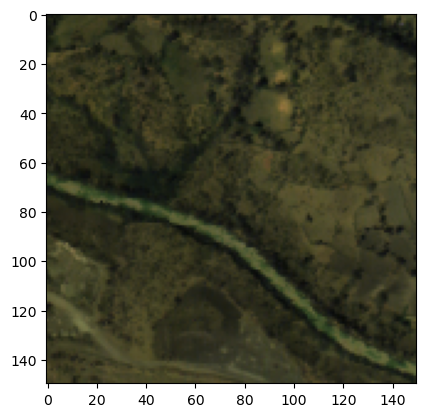

In [106]:
xx,yy= (350,450),(400,500)
xx,yy= (100,250),(100,250)


data= getImage("../earth-data/test1.hdr")
data = subset_img(data,{"xx":xx,"yy":yy})
data= data[:,:,261:]
Fline, Fsample, nband = data.shape
plt.imshow(data[:,:,(1,nband//2,-2)])
targetLibraryPhos= np.load("../earth-data/targetLibraries/targetLibraryPhosphate.npy")
# targetLibraryDolo= np.load("../earth-data/targetLibraries/targetLibraryDolomite.npy")
TargetLibraryRef= targetLibraryPhos[261:,1:]
TargetLibraryName= None
wave= None
Fline, Fsample, nband = data.shape
nline, nsample, nband = data.shape
n =  TargetLibraryRef.shape[1]
detect = np.zeros((nline, nsample, n))
detect_square = np.zeros((Fline, Fsample, n))

In [107]:
# targetLibraryDolo[:,0].tolist()

In [132]:
detect = np.zeros((nline, nsample, n))
detect_square = np.zeros((Fline, Fsample, n))

# a = [6, 8, 5, 7, 10]
# b = [8, 6, 10, 7, 5]
# a = [5,6]
# b = [10,8]
# a = [6,8]
# b = [8,6]
# a= [2,6,3,4,2,3]
# b= [3,4,2,6,2,3]
a= [4,6]
b= [6,4]
DETECT = {}
NorRMSE_min=[]
for window in range(len(a)):
    detect = np.zeros((nline, nsample, n))
    for i in range(1, nline - a[window] + 1):
        for j in range(1, nsample - b[window] + 1):
            data1 = np.reshape(data[i:i + a[window], j:j + b[window], :], (a[window] * b[window], nband)).T
            # print(f"data1.shape {data1.shape}")
            kf, Ek, NorRMSE, model, model1,targetlibraryNor = FATT(data1, TargetLibraryRef, TargetLibraryName, wave, EIGNUMDM='Hysime')
            NorRMSE_min.append(NorRMSE.min())
            for num in range(n):
              
                if NorRMSE[num] <= 1.6e-4:
                    detect[i:i + a[window] - 1, j:j + b[window] - 1, num] = 1

    if Fsample == 7000:
        detect_square[:, 31:630, :] = detect
    else:
        detect_square[:, : , :] = detect

    DETECT[window]= detect_square

w1 = DETECT[0].astype(bool)
w2 = DETECT[1].astype(bool) 
# w3 = DETECT[2].astype(bool)
# w4 = DETECT[3].astype(bool)
# w5 = DETECT[4].astype(bool)
# w6 = DETECT[5].astype(bool)

inter = np.zeros((Fline,Fsample , n))

for i in range(n):
    inter[:, :, i] = w1[:, :, i] & w2[:, :, i] # & w3[:, :, i] & w4[:, :, i] & w5[:, :, i] & w6[:,:,i]

# Assuming a filename for output
# OutputFileName = f"{tr_dir}/DAFATTResults/output.img"
OutputFileName = f"./DAFATTResults/output.img"
inter= inter.astype(int)

d:\RUSHIL-2021-24\Programming_2022-23\isro_project_dec\factor_analysis\fatt.py:106: RuntimeWarning: invalid value encountered in divide
  model1 = model / np.tile(np.sum(model,axis=0), (data.shape[0], 1))


In [133]:
# inter = np.zeros((Fline,Fsample , n))
# for i in range(n):
#     inter[:, :, i] = w1[:, :, i] & w2[:, :, i] & w3[:, :, i] & w4[:, :, i] & w5[:, :, i] & w6[:,:,i]

In [134]:
targetlibraryNor.min()
# NorRMSE_min.sort()
# 1.0617379704916455e-4
min(NorRMSE)
NorRMSE
model1.min()
np.array(NorRMSE_min).min()
Ek.shape

(111, 20)

In [135]:
# plt.bar(range(len(NorRMSE_min)),NorRMSE_min)
# 

In [136]:
min(NorRMSE_min)
# mm =sorted(NorRMSE_min)
# mm

3.314691238627523e-05

In [137]:
ff= w1
detection_area=[]
for i in range(ff.shape[0]):
    for j in range(ff.shape[1]):
        for k in range(ff.shape[2]):
            if ff[i,j,k] and k not in detection_area:
                detection_area.append(k)
detection_area

[1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


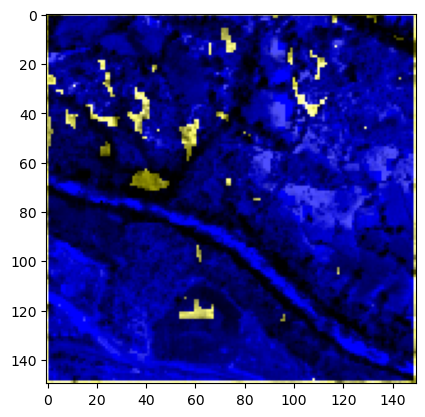

In [138]:
data_t= data[:,:,:]
data_t= contrast_stretch(data_t)
data_t[:,:,0]-=inter[:,:,1]
plt.imshow(data_t[:,:,(0,0,1)])

In [171]:
TargetLibraryRef.shape
model1.shape
nn= model#/TargetLibraryRef
# nn= (nn-nn.max(axis=0))/(nn.min(axis=0)-nn.max(axis=0))
from scipy.signal import savgol_filter
smoothed_values=[]
smoothed_values.append(savgol_filter(nn[:,0], window_length=3, polyorder=2))
smoothed_values.append(savgol_filter(nn[:,1],window_length=3,polyorder=2))
smoothed_values[1]
TargetLibraryRef[:,1]


array([0.809582, 0.799748, 0.799001, 0.800299, 0.799458, 0.800179,
       0.80114 , 0.802519, 0.801471, 0.802212, 0.802482, 0.802713,
       0.802527, 0.803059, 0.802846, 0.802491, 0.802576, 0.80245 ,
       0.803102, 0.803024, 0.8032  , 0.803993, 0.804859, 0.804734,
       0.805726, 0.806072, 0.806253, 0.80679 , 0.807283, 0.807083,
       0.806038, 0.806071, 0.806538, 0.807067, 0.808452, 0.809749,
       0.809493, 0.807785, 0.806539, 0.804988, 0.804609, 0.804219,
       0.804214, 0.804172, 0.80301 , 0.803768, 0.804381, 0.805038,
       0.806153, 0.808431, 0.808316, 0.807661, 0.807574, 0.806825,
       0.807065, 0.806948, 0.807653, 0.807595, 0.808598, 0.807708,
       0.807249, 0.808373, 0.80798 , 0.80832 , 0.807252, 0.806134,
       0.802002, 0.800781, 0.797873, 0.795639, 0.791174, 0.78993 ,
       0.788632, 0.789766, 0.793512, 0.799718, 0.804355, 0.806954,
       0.808038, 0.807867, 0.806306, 0.805454, 0.805313, 0.803892,
       0.801618, 0.801665, 0.799875, 0.799068, 0.798855, 0.800

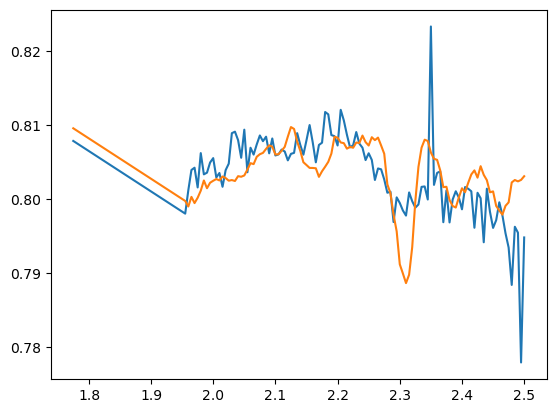

In [172]:
wave= list(targetLibraryPhos[261:,0])
plt.plot(wave,smoothed_values[1])
plt.plot(wave,TargetLibraryRef[:,1])

### Processing and saving the TargetLibraries of Dolomite and Phosphate

In [188]:
# import pandas as pd
# import numpy as np
# df_dolo= pd.read_csv("../earth-data/targetLibraries/targetLibraryResampled1.csv")
# df_phos= pd.read_csv("../earth-data/targetLibraries/targetLibraryResampled2.csv")
# df_dolo["Wavelength"]/=1000
# df_phos["Wavelength"]/=1000

# np.save("../earth-data/targetLibraries/targetLibraryPhosphate.npy",df_phos.to_numpy())
# np.save("../earth-data/targetLibraries/targetLibraryDolomite.npy",df_dolo.to_numpy())